In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
image_path = "../output_videos/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

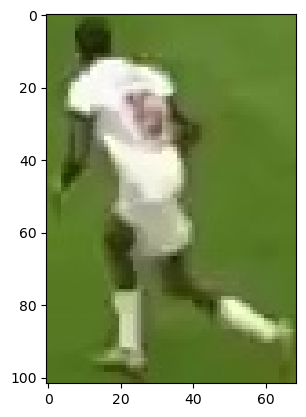

In [3]:
plt.imshow(image)
plt.show()

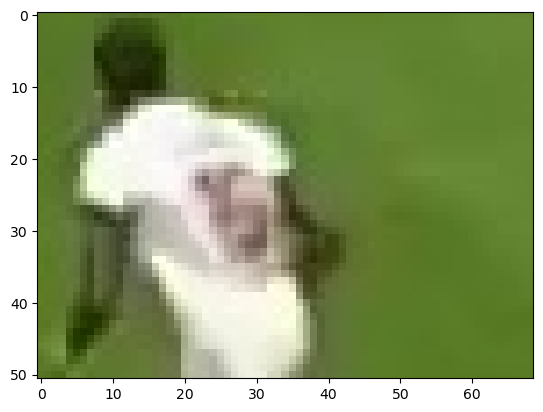

In [4]:
# take the top half of the image
top_half_image = image[0:int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

## cluster the image into two clusters

c:\Users\Yazan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


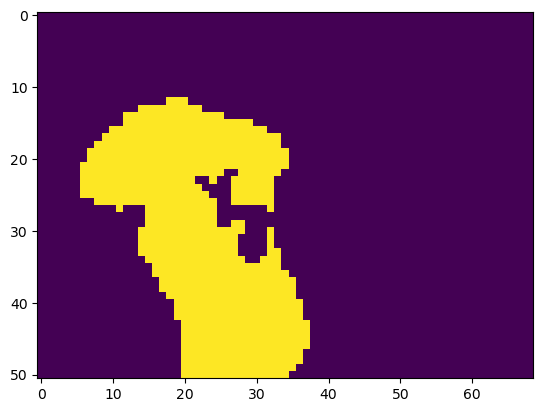

In [9]:
#reshape image into 2d array
image_2d = top_half_image.reshape(-1,3)

#perform k-means clustering with 2 clusters 
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)

# get the cluster labels 
labels = kmeans.labels_

# reshape the labels into the original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# display the clustered image
plt.imshow(clustered_image)
plt.show()

In [10]:
#check the cluster class for player and background
corner_clusters = [clustered_image[0, 0], clustered_image[0,-1], clustered_image[-1, 0], clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters), key = corner_clusters.count)
print(non_player_cluster)

0


In [11]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

1


In [14]:
kmeans.cluster_centers_[player_cluster]

array([222.80501393, 221.20752089, 206.07381616])